In [2]:
import glob
import astropy.io.fits as fits
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from astropy.table import Table
from desitarget.geomask import circles
from desimodel.focalplane import get_tile_radius_deg
from desimodel.footprint import is_point_in_desi

In [3]:
tile_rad = get_tile_radius_deg()

In [4]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
root = '/project/projectdirs/desi/users/forero/sv3_tests/bright_test_20210409/'

In [6]:
tiles = Table.read('/global/cfs/cdirs/desi/users/schlafly/tiling/tiles-4112-packing-20210329-decorated.fits')

In [7]:
# 4 pass strategy
tiles

TILEID,CENTERID,PASS,RA,DEC,PROGRAM,IN_DESI,LST_DESIGN,PRIORITY,STATUS,EBV_MED,STAR_DENSITY,BRIGHTRA [3],BRIGHTDEC [3],BRIGHTVTMAG [3],IMAGEFRAC_G,IMAGEFRAC_R,IMAGEFRAC_Z,IMAGEFRAC_GR,IMAGEFRAC_GRZ,IN_IMAGING
int32,int64,int32,float64,float64,bytes6,bool,float32,int32,bytes5,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,bool
-1,1,0,237.47300720214844,-20.21500015258789,dark,False,0.0,0,unobs,0.20837934,11133.172,238.33358861 .. 237.90868278,-20.16699639 .. -18.93936667,5.022 .. 7.433,0.0,0.0,0.0,0.0,0.0,False
-1,2,0,235.93499755859375,-23.23200035095215,dark,False,0.0,0,unobs,0.25514945,11590.699,235.07043833 .. 234.83911722,-23.81806056 .. -23.15017361,5.103 .. 6.325,0.0,0.0,0.0,0.0,0.0,False
-1,3,0,232.30799865722656,-23.444000244140625,dark,False,0.0,0,unobs,0.1472628,10523.135,233.28971694 .. 233.06306028,-24.49034778 .. -23.8801675,6.942 .. 7.047,0.0,0.0,0.0,0.0,0.0,False
-1,4,0,234.3280029296875,-26.233999252319336,dark,False,0.0,0,unobs,0.2892885,12582.009,234.36877528 .. 235.79810056,-26.27981167 .. -25.41555139,6.19 .. 7.312,0.0,0.0,0.0,0.0,0.0,False
-1,5,0,241.08299255371094,-19.851999282836914,dark,False,0.0,0,unobs,0.27445364,12658.264,241.35931389 .. 241.85125556,-19.80539611 .. -20.86865722,2.592 .. 4.404,0.0,0.0,0.0,0.0,0.0,False
-1,6,0,233.92300415039062,-20.461999893188477,dark,False,0.0,0,unobs,0.14480613,9684.334,234.72712861 .. 234.56768278,-19.30171306 .. -21.01615722,5.456 .. 5.935,0.0,0.0,0.0,0.0,0.0,False
-1,7,0,235.4759979248047,-17.464000701904297,dark,False,0.0,0,unobs,0.11265544,9226.807,234.67256056 .. 235.98811194,-17.66478972 .. -16.86924111,7.253 .. 7.433,0.0,0.0,0.0,0.0,0.0,False
-1,8,0,230.35699462890625,-20.638999938964844,dark,False,0.0,0,unobs,0.13349733,8159.242,231.70979556 .. 229.95893944,-20.00508306 .. -19.55026694,7.062 .. 7.129,0.0,0.0,0.0,0.0,0.0,False
-1,9,0,228.67100524902344,-23.589000701904297,dark,False,0.0,0,unobs,0.13568538,8998.043,229.0959625 .. 227.46380167,-22.39941917 .. -23.98590556,5.664 .. 6.723,0.0,0.0,0.0,0.0,0.0,False


In [8]:
btiles = Table.read(root + '/one_pct_bright_tiles.fits')

In [9]:
btiles

TILEID,RA,DEC,OBSCONDITIONS,IN_DESI,PASS,PROGRAM
int32,float64,float64,int32,int16,int16,bytes6
64297,171.40699768066406,50.92599868774414,7,1,0,SV3
64298,171.52200317382812,54.262001037597656,7,1,0,SV3
64299,176.7270050048828,55.75899887084961,7,1,0,SV3
64300,171.65499877929688,57.5989990234375,7,1,0,SV3
64301,166.86000061035156,49.15999984741211,7,1,0,SV3
64302,176.2100067138672,52.435001373291016,7,1,0,SV3
64303,175.76699829101562,49.10900115966797,7,1,0,SV3
64304,181.33599853515625,53.742000579833984,7,1,0,SV3
64305,182.302001953125,57.034000396728516,7,1,0,SV3


In [10]:
np.unique(btiles['PASS'])

0
1
2
3


In [11]:
np.unique(btiles['OBSCONDITIONS'])

7


In [12]:
np.unique(btiles['IN_DESI'])

1


0 37
1 37
2 35
3 37


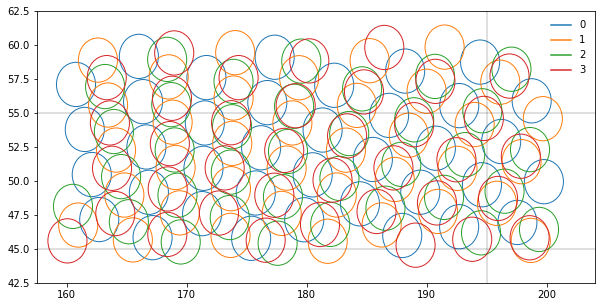

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

plt.sca(ax)

for ppass, color in zip(range(4), colors):
    in_pass=btiles['PASS'] == ppass
    circles(btiles['RA'][in_pass], btiles['DEC'][in_pass], s=tile_rad, c=color, fc='none', label=ppass)
    
    print(ppass, np.count_nonzero(in_pass))
    
    ax.plot(0., 0., color=color, label=ppass)
    
# 256 sqdeg around 155<ra<195, 45<dec<55)
pl.axvline(155., c='k', alpha=1., lw=0.25)
pl.axvline(195., c='k', alpha=1., lw=0.25)

pl.axhline(45., c='k', alpha=1., lw=0.25)
pl.axhline(55., c='k', alpha=1., lw=0.25)

ax.set_xlim(157.5, 204.)
ax.set_ylim(42.5, 62.5)

ax.legend(frameon=False)

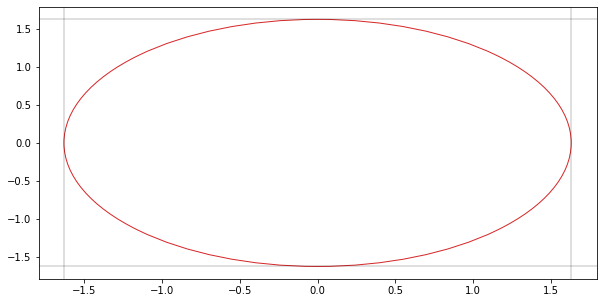

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

plt.sca(ax)

circles(0.0, 0.0, s=tile_rad, c=color, fc='none', label=ppass)

pl.axvline(tile_rad, c='k', alpha=1., lw=0.25)
pl.axvline(-1. * tile_rad, c='k', alpha=1., lw=0.25)

pl.axhline(tile_rad, c='k', alpha=1., lw=0.25)
pl.axhline(-1. * tile_rad, c='k', alpha=1., lw=0.25)

In [15]:
skies = Table.read(root + '/sky_onepct.fits')

In [16]:
skies

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,RA,DEC,BLOBDIST,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL
int32,int32,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,int64,int64,int64,int64
9011,615994,1601p595,970,160.01084144433597,59.577339200066746,65.27243,0.00024258738,0.0649465,0.057883475,10127.024,2621.381,195.09947,616094133081080778,4294967296,0,0,0.2793757144022956,63,-1,-1,7444
9011,615994,1601p595,971,160.01012283153491,59.577338511343534,65.27243,0.01757932,0.010296106,0.097438484,10164.59,2623.7751,195.01744,616094133081080779,4294967296,0,0,0.12282802432629869,63,-1,-1,7444
9011,615994,1601p595,1005,160.011986659491,59.578577510860406,49.0,0.00757909,-0.0028593533,0.012400207,10095.899,2624.4543,194.75569,616094133081080813,4294967296,0,0,0.5895337976493851,63,-1,-1,7444
9011,615994,1601p595,1006,160.0072436410502,59.57857293389187,52.566475,0.008928666,-0.034788247,-0.058298826,10081.542,2621.001,194.98572,616094133081080814,4294967296,0,0,0.2701823408569065,63,-1,-1,7444
9011,615994,1601p595,1038,160.04013054983199,59.58798946251691,37.27622,0.00631239,-0.016182294,-0.0615226,10153.957,2602.037,198.37923,616094133081080846,4294967296,0,0,0.6337276964732511,63,-1,-1,7444
9011,615994,1601p595,1039,160.0378313223525,59.587623870353326,41.781322,-0.029305732,-0.043098114,-0.067846835,10092.272,2600.9465,198.50854,616094133081080847,4294967296,0,0,0.10288799590789732,63,-1,-1,7444
9011,615994,1601p595,1040,160.0106523917527,59.589492896532974,35.578705,0.00090577017,0.0072265547,-0.021287562,10050.109,2582.0198,194.9493,616094133081080848,4294967296,0,0,0.10528889647341122,63,-1,-1,7444
9011,615994,1601p595,1072,160.05519485412745,59.60102682263015,36.931744,-0.0068018697,-0.0049780393,-0.0073044007,10085.349,2588.0332,194.32599,616094133081080880,4294967296,0,0,0.5666769873202748,63,-1,-1,7444
9011,615994,1601p595,1073,160.05476338215448,59.60102655554645,34.996094,-0.0034251804,-0.014471111,0.01917796,10044.042,2587.7222,194.279,616094133081080881,4294967296,0,0,0.948001412617933,63,-1,-1,7444


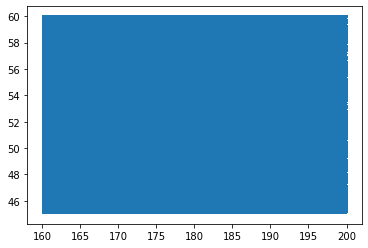

In [17]:
pl.plot(skies['RA'], skies['DEC'], marker=',', lw=0.0)

In [18]:
mtl = Table.read(root + '/mtl_bright_sv3_onepct.fits', 'MTL')

In [19]:
mtl

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,SERSIC,SERSIC_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SV3_SCND_TARGET,HPXPIXEL,NUMOBS_MORE,NUMOBS,Z,ZWARN,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,PRIORITY
int16,int32,bytes8,int32,bytes4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,int64,float64,int64,int32,bytes16,bytes19,bytes14,int64
9011,617455,1608p600,278,SER,160.64038965648487,263241760000.0,59.87989208753042,283578300000.0,33488.52 .. 50384.03,0.011872213,7.308481,20.884258,39.61011,172.37671,43.565845,13.760479,0.9654662,0.97660434,0.9868454,0.018219428,0.006421238,0.0018432725,0.007982005,0.0068636583,0.007901271,0.999064,0.9992111,0.9992872,3,3,3,765.0488,264.71634,85.57445,567.9298,167.74568,50.084656,51.03524,39.523273,42.229477,3181.6328,2.5552266,0.7833787,0.0009793648,1.3072609e-05,0.99799,0.9987651,0.9997365,0.9999005,0,0,0,1.6343924,4.670337,8.857991,1.634394,4.6703396,8.857993,0.0,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,1.5306265,-0.025772572,0.14364493,12020.962,17406.166,40187.73,1.601321,550.6243,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,N,39633386905534742,1152921504606846976,514,0,0.613468360453124,516,102100,1,0,7445,1,0,-1.0,-1,-1,BGS|UNOBS,2021-04-09T01:31:55,0.57.1.dev4806,102100
9011,617455,1608p600,313,REX,160.64355459229822,161657700000.0,59.976152872474124,166094960000.0,20924.955 .. 0.0,0.011233598,7.5548387,11.402238,15.090679,226.99945,69.03967,22.942734,0.9672931,0.97784877,0.98754853,0.0014740784,0.0002889631,0.0008853512,0.0043743635,0.0034364497,0.0033107046,0.9993052,0.9994019,0.9991546,3,3,3,765.0488,264.71634,87.19916,567.9298,167.74568,50.861668,8.794306,6.0978937,12.649952,167.56541,3.972847,1.0466777,0.0010564516,1.3265189e-05,0.9980981,0.9988315,0.9997507,0.9999058,0,0,0,2.231258,3.3675551,4.456905,2.231258,3.3675551,4.456905,0.0,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,

0 37
1 37
2 35
3 37


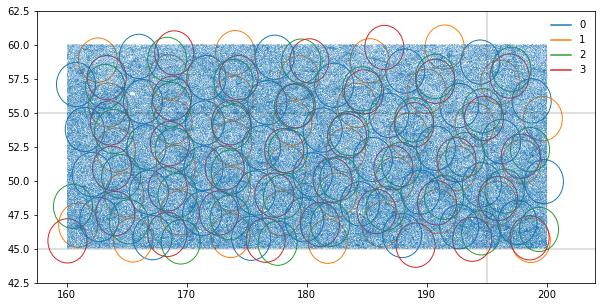

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

plt.sca(ax)

ax.plot(mtl['RA'], mtl['DEC'], marker=',', lw=0.0, alpha=0.1)

for ppass, color in zip(range(4), colors):
    in_pass=btiles['PASS'] == ppass
    circles(btiles['RA'][in_pass], btiles['DEC'][in_pass], s=tile_rad, c=color, fc='none', label=ppass)
    
    print(ppass, np.count_nonzero(in_pass))
    
    ax.plot(0., 0., color=color, label=ppass)
    
# 256 sqdeg around 155<ra<195, 45<dec<55)
pl.axvline(155., c='k', alpha=1., lw=0.25)
pl.axvline(195., c='k', alpha=1., lw=0.25)

pl.axhline(45., c='k', alpha=1., lw=0.25)
pl.axhline(55., c='k', alpha=1., lw=0.25)

ax.set_xlim(157.5, 204.)
ax.set_ylim(42.5, 62.5)

ax.legend(frameon=False)

In [21]:
len(btiles), 37 + 37 + 35 + 37

(146, 146)

In [22]:
in_footprint, indx = is_point_in_desi(btiles, mtl['RA'], mtl['DEC'], radius=tile_rad, return_tile_index=True)

In [23]:
indx

array([ 49,  49,  49, ..., 122, 122, 122])

0 37
1 37
2 35
3 37


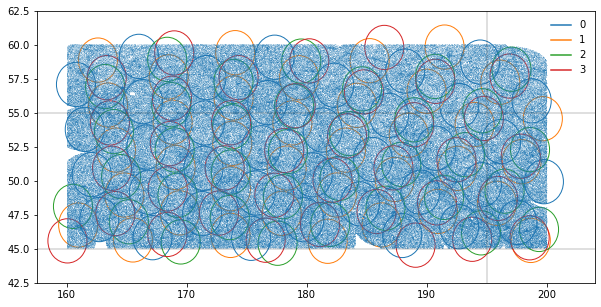

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

plt.sca(ax)

pl.plot(mtl['RA'][in_footprint], mtl['DEC'][in_footprint], marker=',', lw=0.0, alpha=0.1)

for ppass, color in zip(range(4), colors):
    in_pass=btiles['PASS'] == ppass
    circles(btiles['RA'][in_pass], btiles['DEC'][in_pass], s=tile_rad, c=color, fc='none', label=ppass)
    
    print(ppass, np.count_nonzero(in_pass))
    
    ax.plot(0., 0., color=color, label=ppass)
    
# 256 sqdeg around 155<ra<195, 45<dec<55)
pl.axvline(155., c='k', alpha=1., lw=0.25)
pl.axvline(195., c='k', alpha=1., lw=0.25)

pl.axhline(45., c='k', alpha=1., lw=0.25)
pl.axhline(55., c='k', alpha=1., lw=0.25)

ax.set_xlim(157.5, 204.)
ax.set_ylim(42.5, 62.5)

ax.legend(frameon=False)

In [25]:
files = glob.glob(root + '/fba-*.fits')

In [26]:
fbas  = [fits.open(f) for f in files]

In [27]:
fbas[0].info()

Filename: /project/projectdirs/desi/users/forero/sv3_tests/bright_test_20210409/fba-064308.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  FASSIGN       1 BinTableHDU     65   5020R x 14C   [J, K, J, J, E, I, J, 3A, D, D, K, B, E, E]   
  2  FTARGETS      1 BinTableHDU     53   3441R x 8C   [K, D, D, K, B, J, D, J]   
  3  FAVAIL        1 BinTableHDU     43   128995R x 3C   [J, J, K]   


In [28]:
# https://github.com/desihub/fiberassign/blob/06240acab043eb3d8ffbe31ab29a29d56a031f3f/src/hardware.h#L24-L28
# define FIBER_STATE_OK 0
# define FIBER_STATE_UNASSIGNED 1
# define FIBER_STATE_STUCK 2
# define FIBER_STATE_BROKEN 4
# define FIBER_STATE_RESTRICT 8
np.unique(fbas[0][1].data['FIBERSTATUS'], return_counts=True)

(array([ 0,  1,  3,  8,  9, 11, 15], dtype=int32),
 array([3426,  846,  503,   15,   14,  177,   39]))

In [29]:
np.count_nonzero(fbas[0][1].data['FIBERSTATUS'] == 0)

3426

In [30]:
np.count_nonzero(fbas[0][1].data['FIBERSTATUS'] == 1)

846

In [31]:
np.count_nonzero((fbas[0][1].data['FIBERSTATUS'] & 2**0) == 0)

3441

In [32]:
np.count_nonzero((fbas[0][1].data['FIBERSTATUS'] & 2**0) != 0)

1579

In [33]:
# Can be restricted but ok. 
np.unique(fbas[0][1].data['FIBERSTATUS'][(fbas[0][1].data['FIBERSTATUS'] & 2**0) == 0], return_counts=True)

(array([0, 8], dtype=int32), array([3426,   15]))

In [34]:
np.unique(fbas[0][1].data['FIBERSTATUS'][fbas[0][1].data['FIBERSTATUS'] == 1], return_counts=True)

(array([1], dtype=int32), array([846]))

In [35]:
# Unassigned
np.unique(fbas[0][1].data['FIBERSTATUS'][(fbas[0][1].data['FIBERSTATUS'] & 2**0) != 0], return_counts=True)

(array([ 1,  3,  9, 11, 15], dtype=int32), array([846, 503,  14, 177,  39]))

OK             	3441
UNASSIGNED     	1579
STUCK          	719
BROKEN         	39
RESTRICT       	245


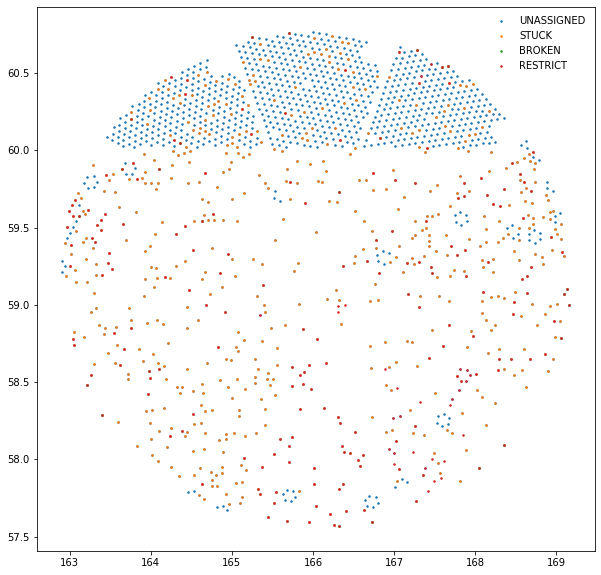

In [36]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

print('{}\t{}'.format('OK'.ljust(15), np.count_nonzero((fbas[0][1].data['FIBERSTATUS'] & 2**0) == 0)))

for label, bit, color in zip(['UNASSIGNED', 'STUCK', 'BROKEN', 'RESTRICT'], [0, 1, 2, 3], colors):
    is_type = (fbas[0][1].data['FIBERSTATUS'] & 2**bit) != 0
    
    print('{}\t{}'.format(label.ljust(15), np.count_nonzero(is_type)))
    
    ax.plot(fbas[0][1].data['TARGET_RA'][is_type], fbas[0][1].data['TARGET_DEC'][is_type], marker='.', lw=0.0, markersize=3, label=label)
    ax.legend(frameon=False)

In [37]:
np.unique(fbas[0]['FASSIGN'].data['FA_TYPE'])

array([0, 1, 2, 3, 4, 8], dtype=uint8)

In [38]:
# https://github.com/desihub/fiberassign/blob/bcb3b508d6b924cc870db7124c637f87ef4b8387/src/targets.h
#
#define TARGET_TYPE_SCIENCE 1
#define TARGET_TYPE_STANDARD 2
#define TARGET_TYPE_SKY 4
#define TARGET_TYPE_SAFE 8
#define TARGET_TYPE_SUPPSKY 16

SCIENCE        	3028
STANDARD       	100
SKY            	410
SAFE           	2
SUPPSKY        	0


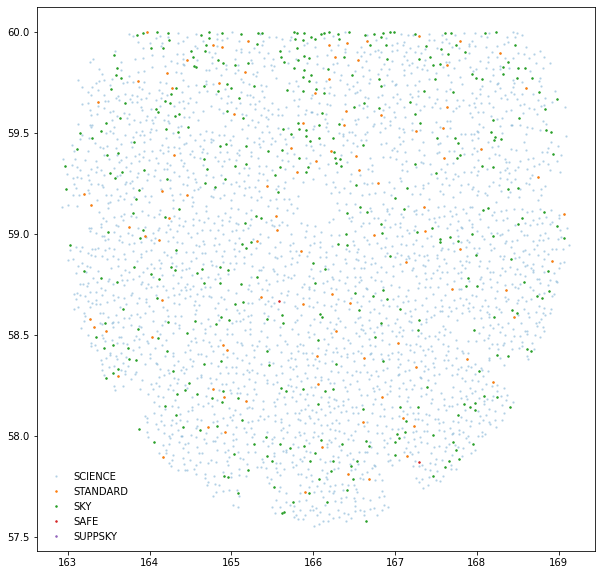

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for label, bit, color in zip(['SCIENCE', 'STANDARD', 'SKY', 'SAFE', 'SUPPSKY'], [0, 1, 2, 3, 4], colors):
    is_type = (fbas[0]['FASSIGN'].data['FA_TYPE'] & 2**bit) != 0
    
    print('{}\t{}'.format(label.ljust(15), np.count_nonzero(is_type)))
    
    if label == 'SCIENCE':
        alpha=0.2
    else:
        alpha=1.0
    
    ax.plot(fbas[0][1].data['TARGET_RA'][is_type], fbas[0][1].data['TARGET_DEC'][is_type], marker='.', lw=0.0, markersize=3, label=label, alpha=alpha)
    ax.legend(frameon=False)

In [40]:
# OK             	3441
# UNASSIGNED     	1579
# STUCK          	719
# BROKEN         	39
# RESTRICT       	245

In [41]:
# 40 skies. 
# 10 standards per petal.

0 37
1 37
2 35
3 37


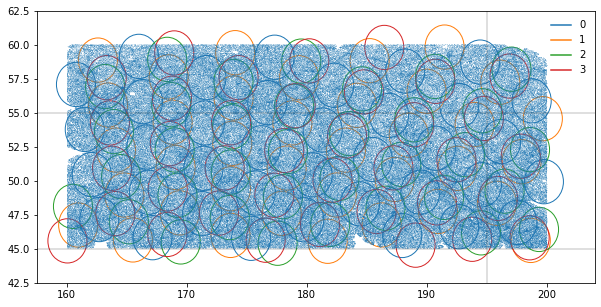

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

plt.sca(ax)

avail = []

for fba in fbas:
    avail += fba['FAVAIL'].data['TARGETID'].tolist()
    
avail = np.unique(avail)
    
in_footprint = np.isin(mtl['TARGETID'], avail)
    
pl.plot(mtl['RA'][in_footprint], mtl['DEC'][in_footprint], marker=',', lw=0.0, alpha=0.1, c=colors[0])

for ppass, color in zip(range(4), colors):
    in_pass=btiles['PASS'] == ppass
    circles(btiles['RA'][in_pass], btiles['DEC'][in_pass], s=tile_rad, c=color, fc='none', label=ppass)
    
    print(ppass, np.count_nonzero(in_pass))
    
    ax.plot(0., 0., color=color, label=ppass)
    
# 256 sqdeg around 155<ra<195, 45<dec<55)
pl.axvline(155., c='k', alpha=1., lw=0.25)
pl.axvline(195., c='k', alpha=1., lw=0.25)

pl.axhline(45., c='k', alpha=1., lw=0.25)
pl.axhline(55., c='k', alpha=1., lw=0.25)

ax.set_xlim(157.5, 204.)
ax.set_ylim(42.5, 62.5)

ax.legend(frameon=False)

0 37
1 37
2 35
3 37


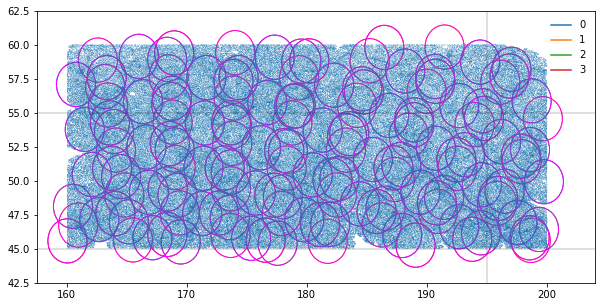

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

plt.sca(ax)

avail = []

for fba in fbas:
    avail += fba['FAVAIL'].data['TARGETID'].tolist()
    
avail = np.unique(avail)
    
in_footprint = np.isin(mtl['TARGETID'], avail)
    
pl.plot(mtl['RA'][in_footprint], mtl['DEC'][in_footprint], marker=',', lw=0.0, alpha=0.1, c=colors[0])

for ppass, color in zip(range(4), colors):
    in_pass=btiles['PASS'] == ppass
    circles(btiles['RA'][in_pass], btiles['DEC'][in_pass], s=tile_rad, c=color, fc='none', label=ppass)
    
    print(ppass, np.count_nonzero(in_pass))
    
    ax.plot(0., 0., color=color, label=ppass)

for fba in fbas:
    ra = fba[0].header['TILERA']
    dec = fba[0].header['TILEDEC']
    
    circles(ra, dec, s=tile_rad, c='magenta', fc='none')
    
# 256 sqdeg around 155<ra<195, 45<dec<55)
pl.axvline(155., c='k', alpha=1., lw=0.25)
pl.axvline(195., c='k', alpha=1., lw=0.25)

pl.axhline(45., c='k', alpha=1., lw=0.25)
pl.axhline(55., c='k', alpha=1., lw=0.25)

ax.set_xlim(157.5, 204.)
ax.set_ylim(42.5, 62.5)

ax.legend(frameon=False)

Huh?

# Done.